## Part 1： 模型理论与应用
1. 在第一部分主要以证明和推导为主。以下几个问题都是比较经典的问题，会对模型的深入理解会有很大的帮助。 特别是对于逻辑回归的二次导数的求解过程可以用来证明一个函数是否凸函数。挑战一下吧！ 

2. 另外，试着也借助这个机会学习一下latex的使用，在后续写文档的时候后可以帮上很多忙， 双击每一个cell,就可以看到数学表达式。 小小建议：把简历也写成LATEX形式，显得更加专业。有一些线上的编辑器可以参考：https://www.sharelatex.com/templates/cv-or-resume

### Part 1.1 逻辑回归相关 (20分)
假设我们有训练数据$D=\{(\mathbf{x}_1,y_1),...,(\mathbf{x}_n,y_n)\}$, 其中$(\mathbf{x}_i,y_i)$为每一个样本，而且$\mathbf{x}_i$是样本的特征并且$\mathbf{x}_i\in \mathcal{R}^D$, $y_i$代表样本数据的标签（label）, 取值为$0$或者$1$. 在逻辑回归中，模型的参数为$(\mathbf{w},b)$。对于向量，我们一般用粗体来表达。请回答以下问题。最好用Markdown自带的Latex来编写。（如果实在不行，可以手写然后拍照完放入word或者转成PDF，作为独立的文件来提交）

# sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{w}}\left( x \right)=\frac{1}{1+{{e}^{-{{w }^{T}}X}}}\\] 

In [1]:
def sigmoid(z):
    # your code here  (appro ~ 1 lines)
    return 1 / (1 + np.exp(-z))

(a) 在逻辑回归模型下，请写出目标函数（objective function）, 也就是我们需要"最小化"的目标（也称之为损失函数或者loss function)，不需要考虑正则 （3分）

$$\begin{align}
  & L(\mathbf{w},b)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{w}}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{w }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{w }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{w }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$

In [2]:
def cost(w, X, y):
    ''' cost fn is -l(theta) for you to minimize'''
    # your code here  (appro ~ 2 lines)
    return np.mean(-y * np.log(sigmoid(X @ w)) - (1 - y) * np.log(1 - sigmoid(X @ w)))
# Hint:X @ theta与X.dot(theta)等价

(b) 求出$L(\mathbf{w},b)$的梯度（或者计算导数），需要必要的中间过程。（3分）


# gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(XW) - y )$

$$\frac{\partial L(\mathbf{w},b)}{\partial {{w }}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{w }}\left({{x}^{(i)}} \right)-{{y}^{(i)}})x^{(i)}}$$

$$\frac{\partial L(\mathbf{w},b)}{\partial b}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{w }}\left({{x}^{(i)}} \right)-{{y}^{(i)}})}$$

In [3]:
def gradient(w, X, y):
    # your code here  (appro ~ 2 lines)
    return (1 / len(X)) * X.T @ (sigmoid(X @ w) - y)

(c) 请写出基于梯度下降法（batch）的对于$\mathbf{w}$和$b$的更新 （3分）

$w^{t+1}=$

$b^{t+1}=$


(d) 假设在(a)的基础上加了一个L2正则项，请写出基于梯度下降法（batch）的对于$\mathbf{w}$和$b$的更新 （3分）

$w^{t+1}=$

$b^{t+1}=$

接下来我们来证明逻辑回归函数是凸函数。假设一个函数是凸函数，我们则可以得出局部最优解即为全局最优解，所以假设我们通过随机梯度下降法等手段找到最优解
时我们就可以确认这个解就是全局最优解。证明凸函数的方法有很多种，在这里我们介绍一种方法，就是基于二次求导大于等于0。比如给定一个函数$f(x)=x^2-3x+3$，做两次
求导之后即可以得出$f''(x)=2 > 0$，所以这个函数就是凸函数。类似的，这种理论也应用于多元变量中的函数上。在多元函数上，只要证明二阶导数是posititive semidefinite即可以。

(e) 在(b)的基础上接着对$\mathbf{w}$求导（等于二阶导数，二阶导数的维度为$D\times D$），这个二阶导数也称之为Hessian Matrix(https://en.wikipedia.org/wiki/Hessian_matrix) 对于矩阵、向量的求导请参考：https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf （4分）


$\frac{\partial^2 \mathcal{L}}{\partial^2 \mathbf{w}}=$

(f) 请说明在(e)的得出来的Hessian Matrix是Positive Definite. 提示：为了证明一个$D\times D$的矩阵$H$为Positive Semidefinite，需要证明对于任意一个非零向量$v\in \mathcal{R}^D$, 需要得出$v^{T}Hv >=0$ （4分）

请推导或者说明：

## Part 2： 情感分析项目 (80分)

本项目的目标是基于用户提供的评论，通过算法自动去判断其评论是正面的还是负面的情感。比如给定一个用户的评论：
- 评论1： “我特别喜欢这个电器，我已经用了3个月，一点问题都没有！”
- 评论2： “我从这家淘宝店卖的东西不到一周就开始坏掉了，强烈建议不要买，真实浪费钱”

对于这两个评论，第一个明显是正面的，第二个是负面的。 我们希望搭建一个AI算法能够自动帮我们识别出评论是正面还是负面。

情感分析的应用场景非常丰富，也是NLP技术在不同场景中落地的典范。比如对于一个证券领域，作为股民，其实比较关注舆论的变化，这个时候如果能有一个AI算法自动给网络上的舆论做正负面判断，然后把所有相关的结论再整合，这样我们可以根据这些大众的舆论，辅助做买卖的决策。 另外，在电商领域评论无处不在，而且评论已经成为影响用户购买决策的非常重要的因素，所以如果AI系统能够自动分析其情感，则后续可以做很多有意思的应用。 

情感分析是文本处理领域经典的问题。整个系统一般会包括几个模块：
- 数据的抓取： 通过爬虫的技术去网络抓取相关文本数据
- 数据的清洗/预处理：在本文中一般需要去掉无用的信息，比如各种标签（HTML标签），标点符号，停用词等等
- 把文本信息转换成向量： 这也成为特征工程，文本本身是不能作为模型的输入，只有数字（比如向量）才能成为模型的输入。所以进入模型之前，任何的信号都需要转换成模型可识别的数字信号（数字，向量，矩阵，张量...)
- 选择合适的模型以及合适的评估方法。 对于情感分析来说，这是二分类问题（或者三分类：正面，负面，中性），所以需要采用分类算法比如逻辑回归，朴素贝叶斯，神经网络，SVM等等。另外，我们需要选择合适的评估方法，比如对于一个应用，我们是关注准确率呢，还是关注召回率呢？ 

在本次项目中，我们已经给定了训练数据和测试数据，它们分别是 train.positive.txt, train.negative.txt， test_combined.txt. 请注意训练数据和测试数据的格式不一样，详情请见文件内容。 整个项目你需要完成以下步骤：

数据的读取以及清洗： 从给定的.txt中读取内容，并做一些数据清洗，这里需要做几个工作： （1） 文本的读取，需要把字符串内容读进来。 （2）去掉无用的字符比如标点符号，多余的空格，换行符等 （3） 分词
把文本转换成TF-IDF向量： 这部分直接可以利用sklearn提供的TfidfVectorizer类来做。
利用逻辑回归模型来做分类，并通过交叉验证选择最合适的超参数
利用支持向量机做分类，并通过交叉验证选择神经网络的合适的参数

In [6]:
import jieba
import nltk
import string
import numpy as np
import operator
from lxml import etree
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
import collections
%matplotlib inline
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import cross_val_score
from bayes_opt import BayesianOptimization

In [7]:
def htmlParser(path, parser):
    comments = []
    with open(path,'r',encoding='UTF-8') as file:
        content = file.read()
        html = etree.HTML(content,etree.HTMLParser())
        text = html.xpath(parser)
        for index in range(len(text)):
            comments.append(text[index].strip())
    return comments

### File Reading: 文本读取 （5分）

In [8]:
def process_file():
    """
    读取训练数据和测试数据，并对它们做一些预处理
    """    
    train_pos_comments = []
    train_pos_labels = []
    train_neg_comments = []
    train_neg_labels = []
    train_comments = []
    train_labels = []
    test_comments = []
    test_labels = []
    train_pos_file = "data/train.positive.txt"
    train_neg_file = "data/train.negative.txt"
    test_comb_file = "data/test.combined.txt"

    # TODO: 读取文件部分，把具体的内容写入到变量里面
    train_pos_comments = htmlParser(train_pos_file,'//review/text()')
    train_pos_labels = np.ones(len(train_pos_comments))
    train_neg_comments = htmlParser(train_neg_file,'//review/text()')
    train_neg_labels = np.zeros(len(train_neg_comments))
    train_comments = train_pos_comments+train_neg_comments
    train_labels = np.hstack((train_pos_labels,train_neg_labels))
    test_comments = htmlParser(test_comb_file,'//review/text()')
    test_labels = htmlParser(test_comb_file,'//review/@label')
    return train_pos_comments,train_neg_comments,train_comments,train_labels,test_comments,test_labels

In [10]:
train_pos_comments,train_neg_comments,train_comments,train_labels,test_comments,test_labels = process_file()
print(len(train_pos_comments),len(train_neg_comments))
print(len(train_comments))
print(len(train_labels))
print(len(test_comments))
print(len(test_labels))

5000 3065
8065
8065
2500
2500


### Explorary Analysis: 做一些简单的可视化分析 （10分） 

In [11]:
# 训练数据和测试数据大小
print (len(train_comments), len(test_comments))

8065 2500


In [12]:
# TODO: 对于训练数据中的正负样本，分别画出一个histogram， histogram的x抽是每一个样本中字符串的长度，y轴是拥有这个长度的样本的百分比。
#       并说出样本长度是否对情感有相关性 (需要先用到结巴分词)
#       参考：https://en.wikipedia.org/wiki/Histogram
def count_sentence(comments):
    len_list = []
    result = []
    for setence in comments:
        comment = []
        for i in jieba.cut(setence):
            comment.append(i)
        len_list.append(len(comment))
        result.append(comment)
    return len_list,result

In [13]:
len_pos,pos_comment = count_sentence(train_pos_comments)
len_neg,neg_comment = count_sentence(train_neg_comments)
print(neg_comment)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.757 seconds.
Prefix dict has been built succesfully.


[['看过', '此人', '在', '百家讲坛', '的', '演讲', '，', '简直', '就是', '垃圾', '。'], ['CD', '中', '的', '曲目', '和', '包装', '上', '的', '完全', '不', '一样', '，', '怀疑', '是', '盗版', '。', '卓越', '要', '给', '个', '说法', '啊', '！'], ['我', '买', '的', '盘', '不知', '怎么', '了', '，', '只', '第一首歌', '有', '许巍唱', '的', '声音', '，', '从', '第二', '首歌', '起', '就', '只有', '音乐', '，', '没有', '歌声', '了', '，', '不知', '为什么', '，', '看样', '是', '盗版', '的', '。'], ['卓越', '的', '书价', '现在', '已经', '不', '便宜', '了', '，', '运费', '优惠', '的', '标准', '也', '在', '提高', '，', '越来越', '失望'], ['没', '看过', '此书', '，', '不过', '作者', '倒', '是', '蛮', '吸引', '人', '的', '！'], ['这个', '东东', '很', '难搞', '耶', ' ', ' ', '不像', '普通', '的', 'CD', '一样', ' ', '就是', '听歌', ' ', ' ', '\n', '要', '上网', ' ', '搞', '这个', ' ', '搞', '那个', ' ', '还是', '搞', '不', '掂'], ['大家', '别买', '了', ' ', '过度', '包装', ' ', '赠品', '垃圾', ' ', '影响', '清晰度', '一般', ' ', '和', '我', '电脑', '下', '的', 'rmvb', '竟然', '一样'], ['我', '在', '贵处', '购买', '的', '该', 'DVD', '，', '看', '的', '很', '好', '。', '但', '有', '一', '问题', '不知', '应', '如何', '处理', '，', '即', '：', '最

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


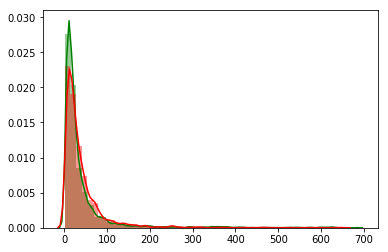

In [14]:
sns.distplot(len_pos,color="g")   # train_pos_comments样本中各长度样本所占百分比
sns.distplot(len_neg,color="r")   # train_neg_comments样本中各长度样本所占百分比

##### Text Cleaning: 文本处理部分 （10分）

In [15]:
# TODO：对于train_comments, test_comments进行字符串的处理，几个考虑的点：
#   1. 停用词过滤
#   2. 去掉特殊符号
#   3. 去掉数字（比如价格..)
#   4. ...
#   需要注意的点是，由于评论数据本身很短，如果去掉的太多，很可能字符串长度变成0
#   预处理部分，可以自行选择合适的方.
stop_words = stopwords.words("english")
def clean_words(comments):
    comments_new = []
    for comment in comments:
        sentence = ''
        for word in list(jieba.cut(comment)):
            # 去除停用词、标点符号、数字
            if word not in set(stop_words) and word.isalnum() and not word.isdigit():
                sentence += word + ' '
        comments_new.append(sentence)
    return comments_new
    
train_comments_new = clean_words(train_comments)
test_comments_new = clean_words(test_comments)
print(train_comments_new)
print(test_comments_new)

['请问 这机 不是 有个 遥控器 的 吗 ', '发短信 特别 不 方便 背后 的 屏幕 很大 用 起来 不 舒服 是 手触 屏 的 切换 屏幕 很 麻烦 ', '手感 超好 而且 黑色 相比 白色 在 转得 时候 不 容易 眼花 找 童年 的 记忆 啦 ', '', '先 付款 的 有 信用 ', '价格 质量 售后 都 很 满意 ', '书 的 质量 和 印刷 都 不错 字 的 大小 也 刚刚 好 很 清楚 喜欢 ', '超级 值得 看 的 一个 电影 ', '今天 突然 看到 卓越 有 卖 这个 的 可是 韩国 不是 卖 没有 了 吗 虽然 是 引进 版 的 可是 之前 也 卖 没有 了 卓越 从 哪里找 出来 的 啊 ', '江大 继续 写 ', '还 不错 得 多 跟着 练 才能 跟 的 上 ', '我 前天 两本 一起 买 还是 元 的 怎么 一下子 就 降价 了 但书 还是 对 我 有 很大 帮助 的 而且 发货 速度 很快 隔天 就 到 了 ', '内容 自 不必 细说 后 的 人 都 知道 质量 比较 好 虽然 不是 尽善尽美 但 企事业 算是 不错 了 ', '不是 的话 看 了 这 本书 后 我 相信 那 就是 真有 时间 隧道 ', '发货 迅速 书 的 质量 也 很 好 很 满意 ', '作为 一本 指导 性质 的 编程 类书籍 这 本书 将 各种 设计模式 演绎 的 淋漓尽致 通俗易懂 看后 使 人 获益匪浅 设计模式 只是 开始 要 真正 的 会 用 用 好 还是 需要 实际 的 磨练 ', '绝对 不 容错过 的 收藏 ', '出售 和 购买 盗版 都 是 违法行为 你们 还敢 随便 在 这里 瞎 起哄 自己 想想 自己 像是 什么 人 吧 ', '不 知道 拨号 数字 大不大 话筒 音量 大不大 ', '神秘园 的 曲子 总是 能 打动 每 一个 人 心中 最 真的 地方 太 好听 了 ', '上次 买 五月天 的 专辑 和 几本书 我 特别 说明 了 要 包装 牢固 joyo 用 了 一个 箱子 我 很 感动 这次 也 是 cd 和 几本书 也 是 有 包装 的 特别 说明 结果 竟然 只有 胶带 气死我了 还好 没有 破损 要不然 对不起 布兰妮 啊 joyo 的 服务 怎么 每况愈下 呢 ', '挺 好 有空 我 也 去 听

In [16]:
# TODO： 分别列出训练数据中正负样本里的top 20单词（可以做适当的stop words removal）。 
def get_top20_words(comments):
    word_library = []   # 储存所有词
    for comment in comments:
        for i in jieba.cut(comment):
            word_library.append(i)
    word_dic = collections.Counter(word_library).most_common(21)
    top20_list = [i[0] for i in word_dic]
    return top20_list

print(get_top20_words(train_comments_new))
print(get_top20_words(test_comments_new))

[' ', '的', '了', '是', '我', '很', '也', '在', '有', '都', '买', '就', '不', '好', '这', '还', '没有', '不错', '和', '喜欢', '看']
[' ', '的', '了', '是', '我', '很', '也', '在', '有', '不', '就', '都', '买', '这', '好', '还', '和', '没有', '说', '卓越', '人']


### Feature Extraction : 从文本中提取特征 （10分）

In [17]:
# TODO: 利用tf-idf从文本中提取特征,写到数组里面. 
#       参考：https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfid_vec = TfidfVectorizer()
X_train = tfid_vec.fit_transform(train_comments)
y_train = np.array(train_labels)
X_test = tfid_vec.transform(test_comments)
y_test = np.array(test_labels)
print(type(y_test))
print (np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

<class 'numpy.ndarray'>
(8065, 47396) (2500, 47396) (8065,) (2500,)


### Modeling: 训练模型以及选择合适的超参数 （25分）

In [18]:
# TODO： 利用逻辑回归来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       逻辑回归的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#       对于逻辑回归，经常调整的超参数为： C



parameters = { 'C':np.logspace(-3,3,7)}#等比数列，开始3结束3，7个
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)
y_predict = clf.predict(X_test)
print(type(y_predict))
# print(classification_report(y_test, y_predict))

{'C': 100.0}
<class 'numpy.ndarray'>


In [ ]:
# TODO： 利用SVM来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':np.logspace(-3,3,7)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)
y_predict = clf.predict(X_test)
# print(classification_report(y_test, y_predict))


对于超参数的调整，我们经常使用gridsearch，这也是工业界最常用的方法，但它的缺点是需要大量的计算，所以近年来这方面的研究也成为了重点。 其中一个比较经典的成果为Bayesian Optimization（利用贝叶斯的思路去寻找最好的超参数）。Ryan P. Adams主导的Bayesian Optimization利用高斯过程作为后验概率（posteior distribution）来寻找最优解。 https://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf 在下面的练习中，我们尝试使用Bayesian Optimization工具来去寻找最优的超参数。参考工具：https://github.com/fmfn/BayesianOptimization

In [ ]:
# TODO: 仍然使用SVM模型，但在这里使用Bayesian Optimization来寻找最好的超参数。 
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用Bayesian Optimization https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel
#       参考Bayesian Optimization开源工具： https://github.com/fmfn/BayesianOptimization

def svm_cv(C, gamma):
    svm = SVC(C=10 ** C, gamma=10 ** gamma,random_state=1)
    val = cross_val_score(svm,X_train, y_train, cv=5).mean()
    return val

pbounds = {'C':(0,1),'gamma':(2,20)}
svm_bo = BayesianOptimization(svm_cv,pbounds=pbounds)

svm_bo.maximize()

### 特征: 添加n-gram特征 (10分)
在原有tf-idf特征的基础上，添加n-gram特征（在这里我们使用bi-gram特征）。添加完之后效果是否有提升？ 为什么？

In [ ]:
# X_train =  # 添加完bigram之后的特征
# y_train =  # 
# X_test =   # 添加完bigram之后的特征
# y_test =   # 

vectorizer = TfidfVectorizer(analyzer="word", stop_words="english", binary=False, ngram_range=(1,2))
X_train = vectorizer.fit_transform(train_comments)
X_test = vectorizer.transform(test_comments)


print (np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

In [ ]:
## TODO 模型的训练，如上

### Extension （10分）
1. 对于情感分析来说，有一个问题也很重要，比如一个句子里出现了 “我不太兴奋”， “不是很满意”。 在这种情况，因为句子中出现了一些积极的词汇很可能被算法识别成正面的，但由于前面有一个“不”这种关键词，所以否定+肯定=否定，算法中这种情况也需要考虑。另外，否定+否定=肯定， 这种情况也一样。 
2. 另外一个问题是aspect-based sentiment analysis, 这个指的是做情感分析的时候，我们既想了解情感，也想了解特定的方面。 举个例子： “这部手机的电池性能不错，但摄像不够清晰啊!”, 分析完之后可以得到的结论是： “电池：正面， 摄像：负面”， 也就是针对于一个产品的每一个性能做判定，这种问题我们叫做aspect-based sentiment analysis，也是传统情感分析的延伸。

Q: 对于如上两个问题，有什么解决方案？ 大概列一下能想到的处理方案。 

TODO






### 拓展建议
如果想挑战一下自己，把上述的问题也实现一下，但不计为本项目的分数。建议好好整理一下代码，上传到github。 

### 其他领域
跟情感分析类似的领域有叫affective computing, 也就是用来识别情绪(emotion recognition)。但情感和情绪又不太一样，情绪指的是高兴，低落，失落，兴奋这些人的情绪。我们知道真正的人工智能是需要读懂人类的情绪的。而且情绪识别有很多场景，比如服务机器人根据不同的情绪来跟用户交流； 无人驾驶里通过识别用户的情绪（摄像头或者声音或者传感器）来保证安全驾驶； IOT领域里设备也需要读懂我们的情绪； 微博里通过文本读懂每个人发文时的情绪。 

总体来讲，情绪识别跟情感识别所用到的技术是类似的，感兴趣的小伙伴，也可以关注一下这个领域。 如果想发论文，强烈建议选择情绪方面的，不建议选择情感分析，因为问题太老了。情绪分析是近几年才开始受关注的领域。 